## Author: Joshua Ewer {-}

In [2]:
import warnings
warnings.filterwarnings('ignore')
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

## Part 1: PCA and Variance Threshold in a Linear Regression {-}

In [ ]:
house_train = pd.read_csv('train.csv')
# drop Id column
house_train = house_train.drop(columns=['Id'])

# replace any NaN values with the mean (if numeric)
numeric_cols = house_train.select_dtypes(include=[np.number]).columns 
house_train[numeric_cols] = house_train[numeric_cols].fillna(house_train[numeric_cols].mean())

# replace empty categorical values with the mode
categorical_cols = house_train.select_dtypes(include=['object']).columns 
house_train[categorical_cols] = house_train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# add dummy variables for all the categorical columns
house_train = pd.get_dummies(house_train, columns=categorical_cols)

In [5]:
# split into test/train, where sales price is the target
x = house_train.drop(columns=['SalePrice']) 
y = house_train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Run linear regression and report R2 and RMSE
model = LinearRegression() 
model.fit(x_train, y_train) 

y_pred = model.predict(x_test) 

r2_value = model.score(x_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

print("R^2-value:", r2_value) 
print("RMSE:", rmse)

R^2-value: 0.8860888074836554
RMSE: 29559.0257831691


In [7]:
# Create a PCA model with 90% variance
pca = PCA(n_components=0.9) 
x_train_pca = pca.fit_transform(x_train) 

# How many features are in the transformed matrix?
print("Number of features:", pca.n_components_)

# Transform (but not fit) the test data
x_test_pca = pca.transform(x_test)

# Run liner regression and report  R2 and RMSE
model = LinearRegression() 
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca) 

r2_value = model.score(x_test_pca, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

print("R^2-value:", r2_value) 
print("RMSE:", rmse)

Number of features: 1
R^2-value: 0.06348982758965971
RMSE: 84754.57815797543


In [8]:
# Apply a min-max scaler to the original training set
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [9]:
# which features have a variance above 0.1
selector = VarianceThreshold(threshold=0.1)
x_selected = selector.fit_transform(x_train_scaled)
print("High variance features (> 0.1):\n", x_train.columns[selector.get_support()])

High variance features (> 0.1):
 Index(['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside',
       'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'G

In [10]:
# Transform (not fit) the test features with the same scaler
x_test_scaled = scaler.transform(x_test)

# and re-run linear regression on the high variance data
model = LinearRegression() 
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled) 

r2_value = model.score(x_test_scaled, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

print("R^2-value:", r2_value) 
print("RMSE:", rmse)

R^2-value: -1.5588340588975843e+21
RMSE: 3457855655549841.0


## Part 2: Categorical Feature Selection {-}

In [12]:
from sklearn.tree import DecisionTreeClassifier
from supertree import SuperTree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [13]:
mushroom = pd.read_csv('mushrooms.csv')

In [14]:
# separate features from the label
x = mushroom.drop(['class'], axis = 1)
y = mushroom['class']

# replace categorical values with dummies
x = pd.get_dummies(x, prefix_sep='_')

# split into test/train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)


In [15]:
# Fit a decision tree classifier 
rf_classifier = DecisionTreeClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

# Show confusion matrix and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[1044    0]
 [   0  987]]


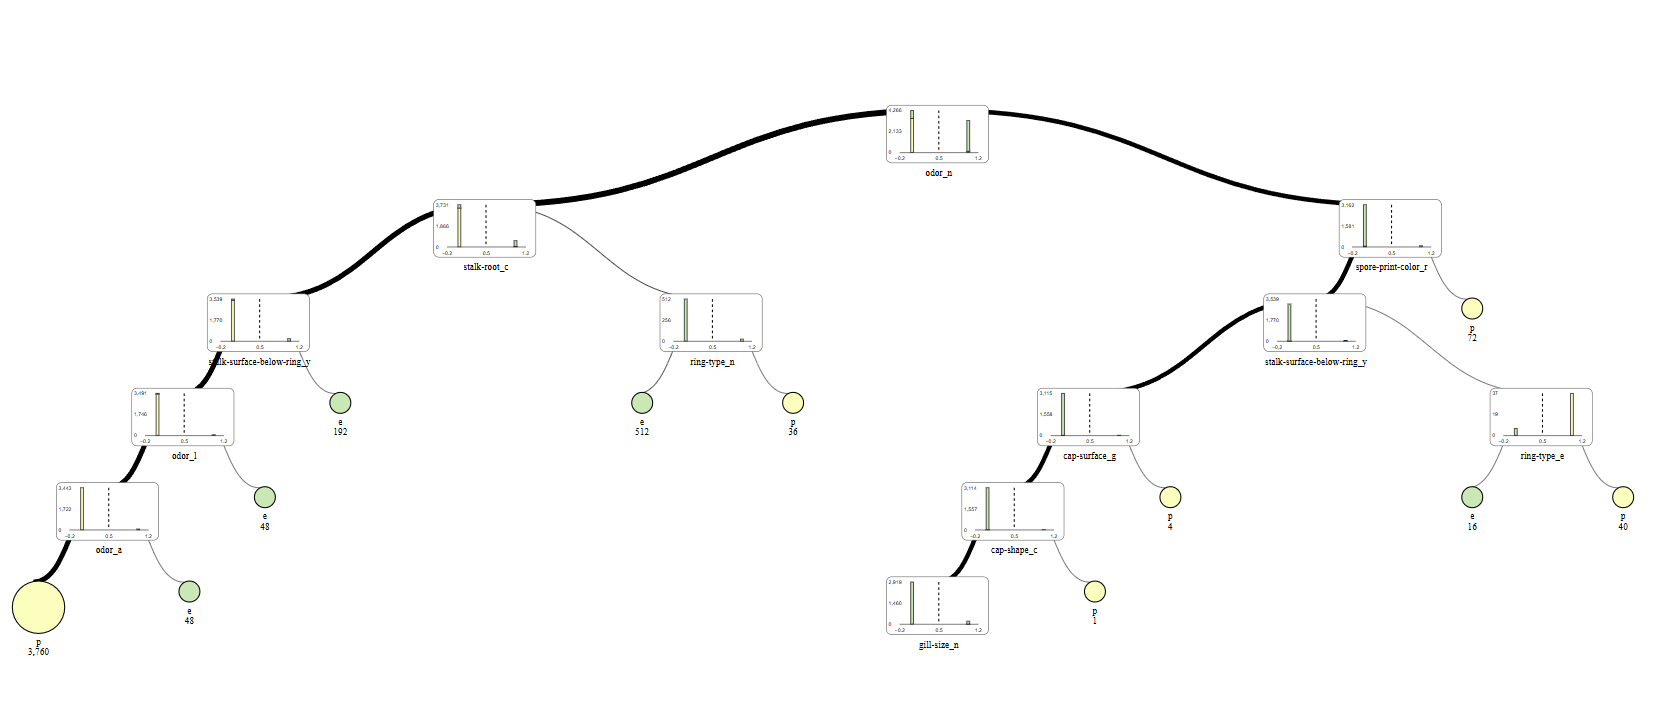

In [63]:
# vizualize the decision tree
super_tree = SuperTree(rf_classifier, x, y, feature_names=x.columns.tolist())

from IPython.display import Image, display

# Display the image with specified width and height
display(Image(filename='tree_viz.png'))

In [17]:
# Choose best 5 features based on X-2 statistic
selector = SelectKBest(score_func=chi2, k=5)
x_selected = selector.fit_transform(x, y)

# Get the selected feature names
selected_features = x.columns[selector.get_support()]
print('Selected Features:', selected_features)

Selected Features: Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [18]:
# Repeat classification steps using just these features
# Split the dataset into training and testing sets using the selected features
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

# Fit the Decision Tree Classifier on the training set
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Report the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9267692307692308
Confusion Matrix:
[[843   0]
 [119 663]]
